In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('/content/drive/MyDrive/BDA Dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [ ]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [ ]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [ ]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


count          mean           std  \
Destination Port             2830743.0  8.071483e+03  1.828363e+04   
Flow Duration                2830743.0  1.478566e+07  3.365374e+07   
Total Fwd Packets            2830743.0  9.361160e+00  7.496728e+02   
Total Backward Packets       2830743.0  1.039377e+01  9.973883e+02   
Total Length of Fwd Packets  2830743.0  5.493024e+02  9.993589e+03   
Total Length of Bwd Packets  2830743.0  1.616264e+04  2.263088e+06   
Fwd Packet Length Max        2830743.0  2.075999e+02  7.171848e+02   
Fwd Packet Length Min        2830743.0  1.871366e+01  6.033935e+01   
Fwd Packet Length Mean       2830743.0  5.820194e+01  1.860912e+02   
Fwd Packet Length Std        2830743.0  6.891013e+01  2.811871e+02   
Bwd Packet Length Max        2830743.0  8.708495e+02  1.946367e+03   
Bwd Packet Length Min        2830743.0  4.104958e+01  6.886260e+01   
Bwd Packet Length Mean       2830743.0  3.059493e+02  6.052568e+02   
Bwd Packet Length Std        2830743.0  3.353257e+02  8.396932e+02   
Flow Bytes/s                 2829385.0           inf           NaN   
Flow Packets/s               2830743.0           inf           NaN   
Flow IAT Mean                2830743.0  1.298449e+06  4.507944e+06   
Flow IAT Std                 2830743.0  2.919271e+06  8.045870e+06   
Flow IAT Max                 2830743.0  9.182475e+06  2.445954e+07   
Flow IAT Min                 2830743.0  1.623796e+05  2.950282e+06   
Fwd IAT Total                2830743.0  1.448296e+07  3.357581e+07   
Fwd IAT Mean                 2830743.0  2.610193e+06  9.525722e+06   
Fwd IAT Std                  2830743.0  3.266957e+06  9.639055e+06   
Fwd IAT Max                  2830743.0  9.042939e+06  2.452916e+07   
Fwd IAT Min                  2830743.0  1.021893e+06  8.591436e+06   
Bwd IAT Total                2830743.0  9.893830e+06  2.873661e+07   
Bwd IAT Mean                 2830743.0  1.805784e+06  8.887197e+06   
Bwd IAT Std                  2830743.0  1.485973e+06  6.278469e+06   
Bwd IAT Max                  2830743.0  4.684692e+06  1.716095e+07   
Bwd IAT Min                  2830743.0  9.672614e+05  8.308983e+06   
Fwd PSH Flags                2830743.0  4.644646e-02  2.104500e-01   
Bwd PSH Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2830743.0  1.112782e-04  1.054826e-02   
Bwd URG Flags                2830743.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2830743.0 -2.599739e+04  2.105286e+07   
Bwd Header Length            2830743.0 -2.273275e+03  1.452209e+06   
Fwd Packets/s                2830743.0  6.386535e+04  2.475371e+05   
Bwd Packets/s                2830743.0  6.995192e+03  3.815170e+04   
Min Packet Length            2830743.0  1.643450e+01  2.523772e+01   
Max Packet Length            2830743.0  9.504024e+02  2.028229e+03   
Packet Length Mean           2830743.0  1.719444e+02  3.054915e+02   
Packet Length Std            2830743.0  2.949756e+02  6.318001e+02   
Packet Length Variance       2830743.0  4.861548e+05  1.647490e+06   
FIN Flag Count               2830743.0  3.537976e-02  1.847378e-01   
SYN Flag Count               2830743.0  4.644646e-02  2.104500e-01   
RST Flag Count               2830743.0  2.423392e-04  1.556536e-02   
PSH Flag Count               2830743.0  2.980705e-01  4.574107e-01   
ACK Flag Count               2830743.0  3.158443e-01  4.648513e-01   
URG Flag Count               2830743.0  9.482316e-02  2.929706e-01   
CWE Flag Count               2830743.0  1.112782e-04  1.054826e-02   
ECE Flag Count               2830743.0  2.433990e-04  1.559935e-02   
Down/Up Ratio                2830743.0  6.835004e-01  6.804920e-01   
Average Packet Size          2830743.0  1.919837e+02  3.318603e+02   
Avg Fwd Segment Size         2830743.0  5.820194e+01  1.860912e+02   
Avg Bwd Segment Size         2830743.0  3.059493e+02  6.052568e+02   
Fwd Header Length.1          2830743.0 -2.599739e+04  2.105286e+07   
Fwd Avg Bytes/Bulk           2830743.0  0.0

In [ ]:
pd.options.display.max_columns = 80
data

Destination Port  Flow Duration  Total Fwd Packets  \
0                  49188              4                  2   
1                  49188              1                  2   
2                  49188              1                  2   
3                  49188              1                  2   
4                  49486              3                  2   
...                  ...            ...                ...   
225740             61374             61                  1   
225741             61378             72                  1   
225742             61375             75                  1   
225743             61323             48                  2   
225744             61326             68                  1   

        Total Backward Packets  Total Length of Fwd Packets  \
0                            0                           12   
1                            0                           12   
2                            0                           12   
3                            0                           12   
4                            0                           12   
...                        ...                          ...   
225740                       1                            6   
225741                       1                            6   
225742                       1                            6   
225743                       0                           12   
225744                       1                            6   

        Total Length of Bwd Packets  Fwd Packet Length Max  \
0                                 0                      6   
1                                 0                      6   
2                                 0                      6   
3                                 0                      6   
4                                 0                      6   
...                             ...                    ...   
225740                            6                      6   
225741                            6                      6   
225742                            6                      6   
225743                            0                      6   
225744                            6                      6   

        Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
0                           6                     6.0                    0.0   
1                           6                     6.0                    0.0   
2                           6                     6.0                    0.0   
3                           6                     6.0                    0.0   
4                           6                     6.0                    0.0   
...                       ...                     ...                    ...   
225740                      6                     6.0                    0.0   
225741                      6                     6.0                    0.0   
225742                      6                     6.0                    0.0   
225743                      6                     6.0                    0.0   
225744                      6                     6.0                    0.0   

        Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
0                           0                      0                     0.0   
1                           0                      0                     0.0   
2                           0                      0                     0.0   
3                           0                      0                     0.0   
4                           0                      0                     0.0   
...                       ...                    ...                     ...   
225740                      6                      6                     6.0   
225741                      6                      6                     6.0   
225742                      6                      6                     6.0   


In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [ ]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

In [ ]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


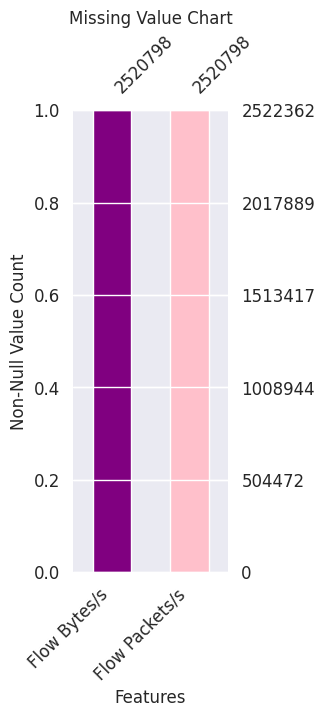

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Define custom purple-pink palette
colors = sns.color_palette(["purple", "pink"])

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize=(2, 6))
msno.bar(data[missing_vals], ax=ax, fontsize=12, color=colors)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Non-Null Value Count', fontsize=12)
ax.set_title('Missing Value Chart', fontsize=12)
plt.show()


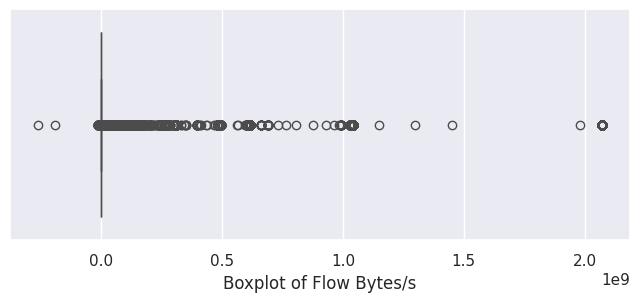

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

In [ ]:
data.reset_index(drop=True, inplace=True)

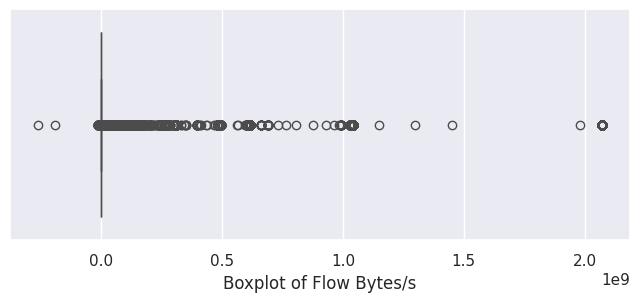

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

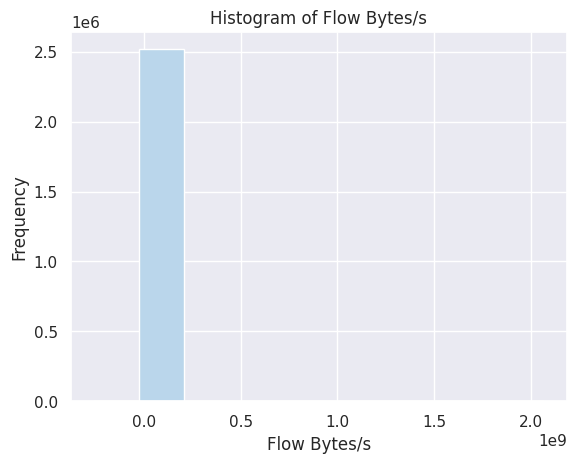

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

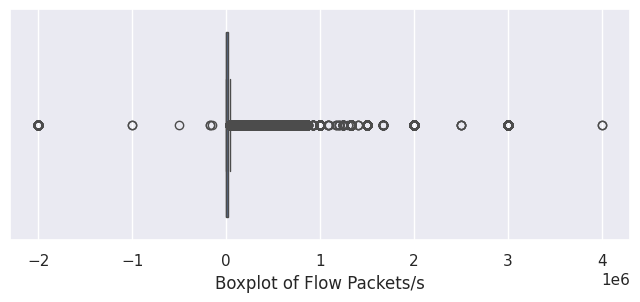

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [ ]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

/tmp/ipython-input-1818654804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
/tmp/ipython-input-1818654804.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [ ]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [ ]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [ ]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

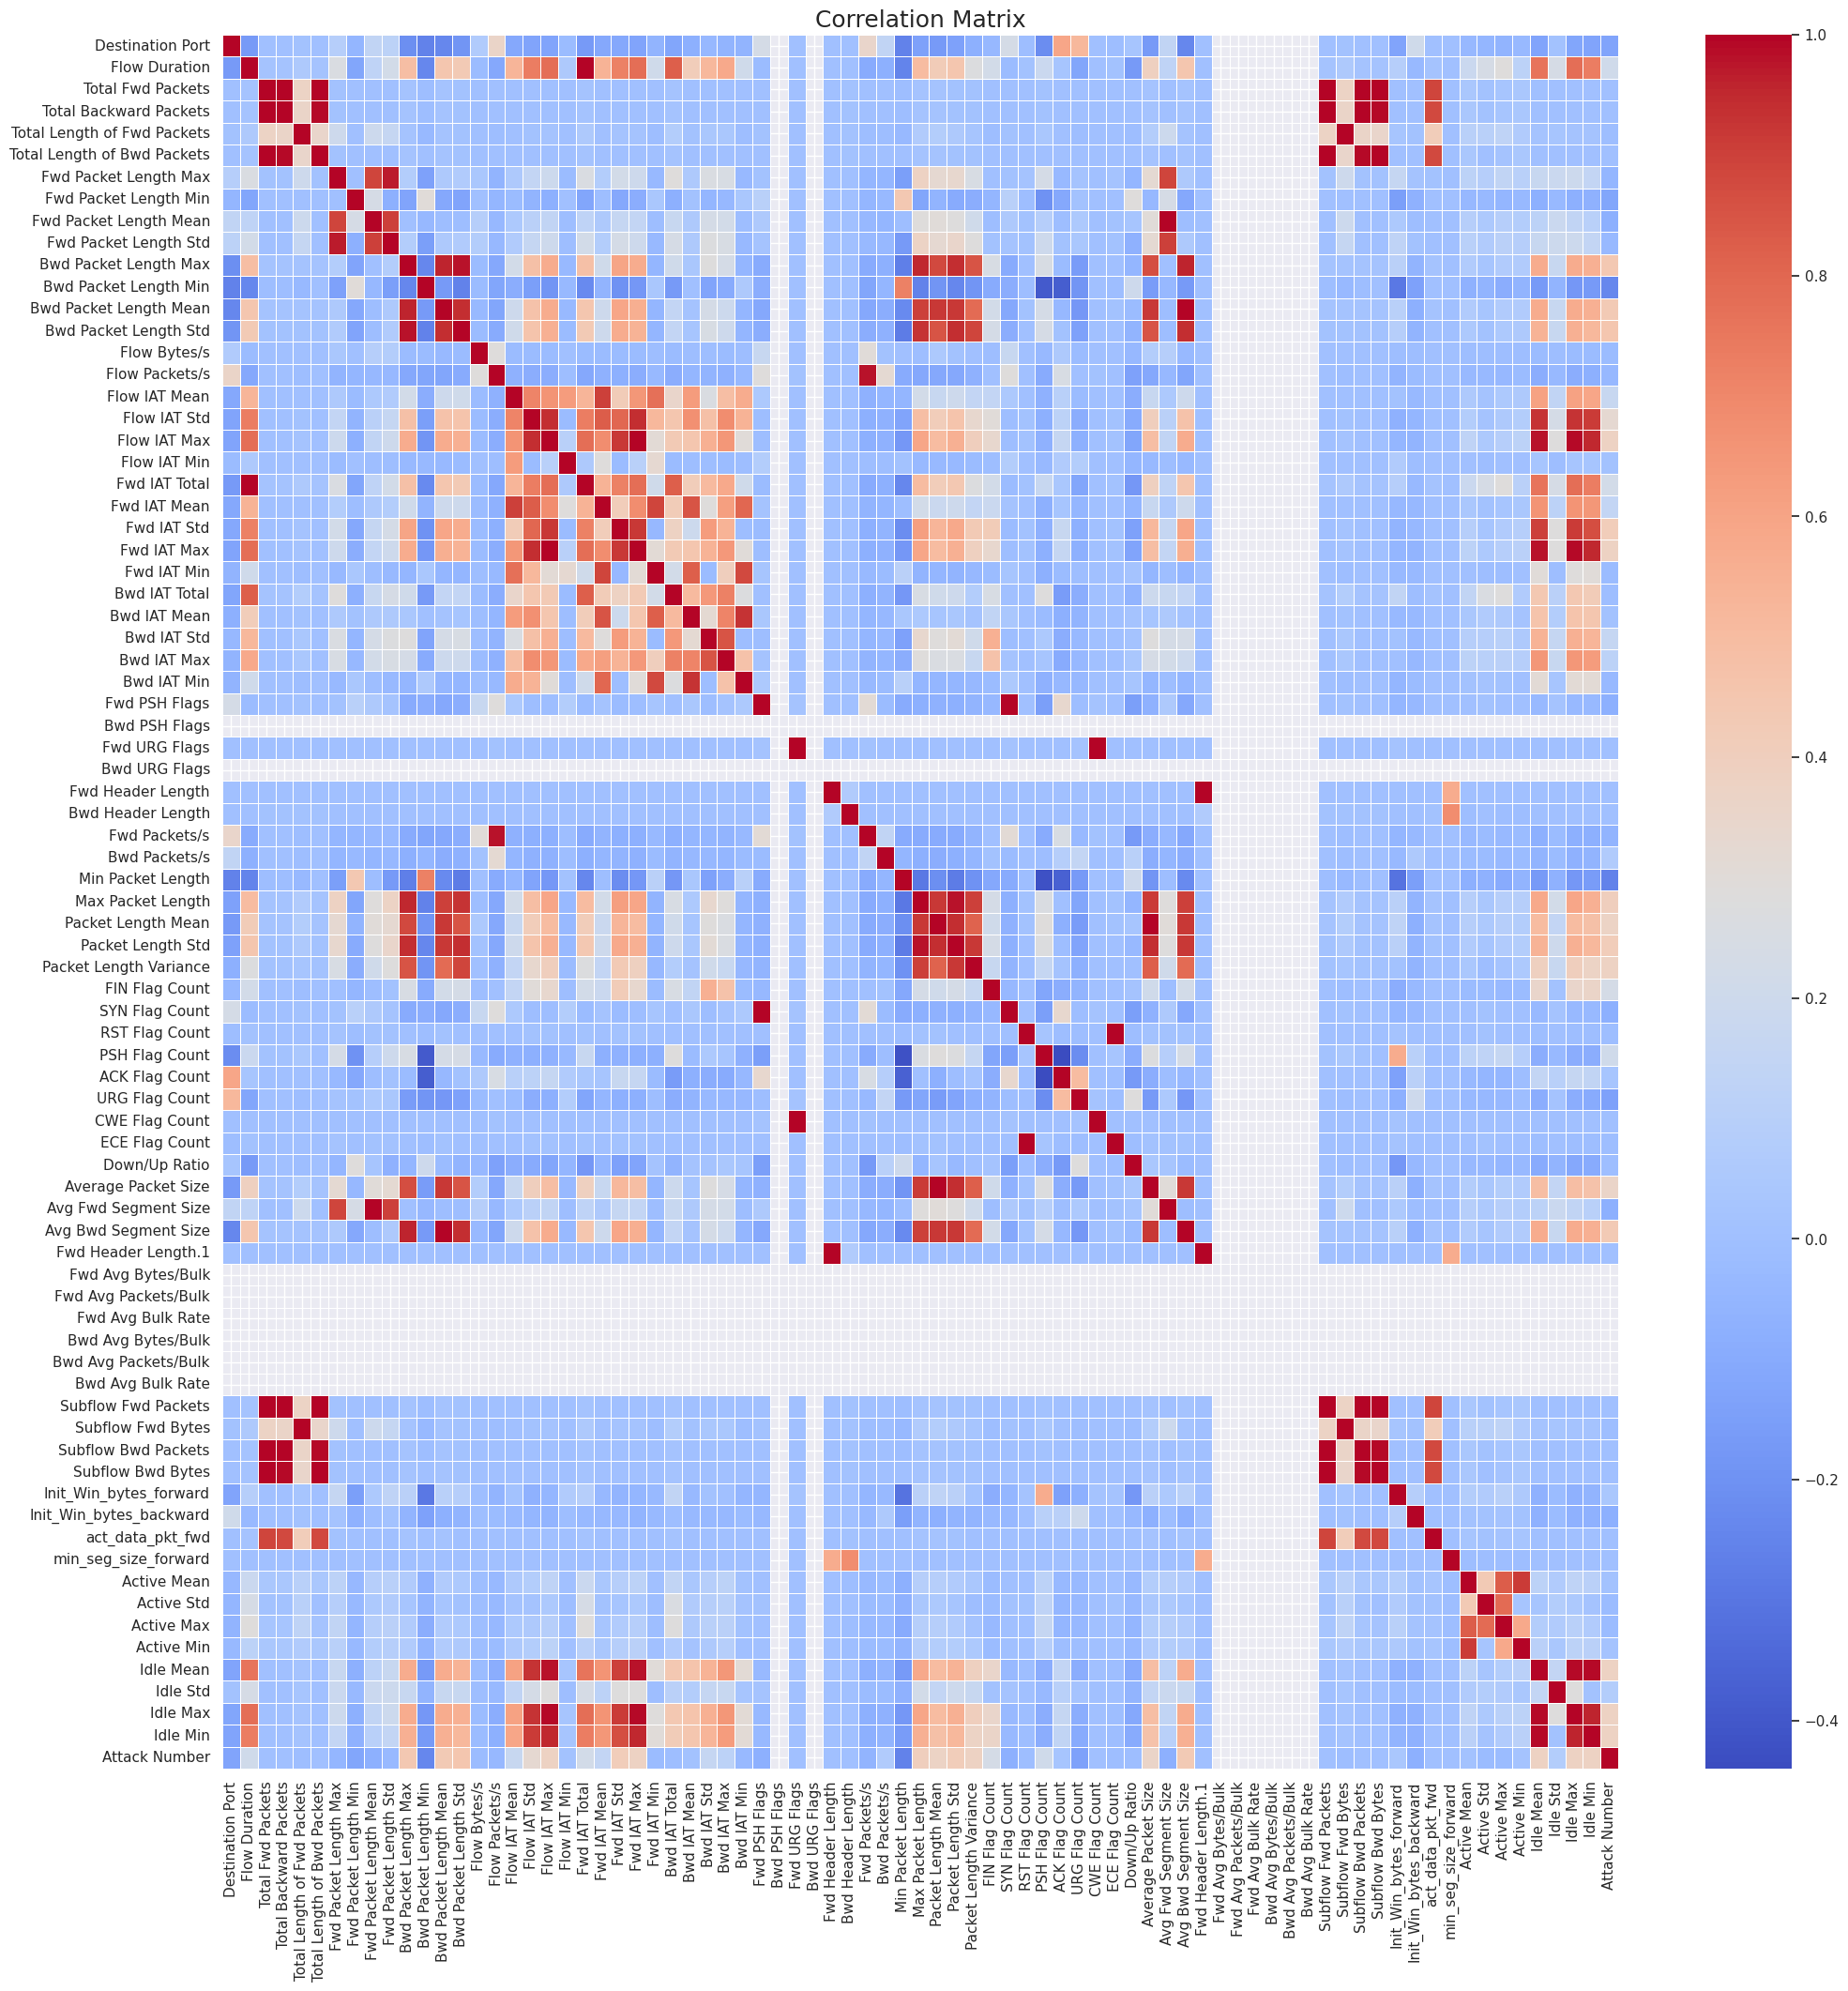

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [ ]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [ ]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8686.623973           0.21%
Flow Duration                   16581323.773163       16502842.174093       0.47%
Total Fwd Packets               10.276271             12.078062             17.53%
Total Backward Packets          11.565964             13.914412             20.30%
Total Length of Fwd Packets     611.575108            601.844586            1.59%
Total Length of Bwd Packets     18133.153930          24424.988089          34.70%
Fwd Packet Length Max           231.091768            230.009202            0.47%
Fwd Packet Length Min           19.194641             19.036484             0.82%
Fwd Packet Length Mean          63.470104             63.151403             0.50%
Fwd Packet Length Std 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

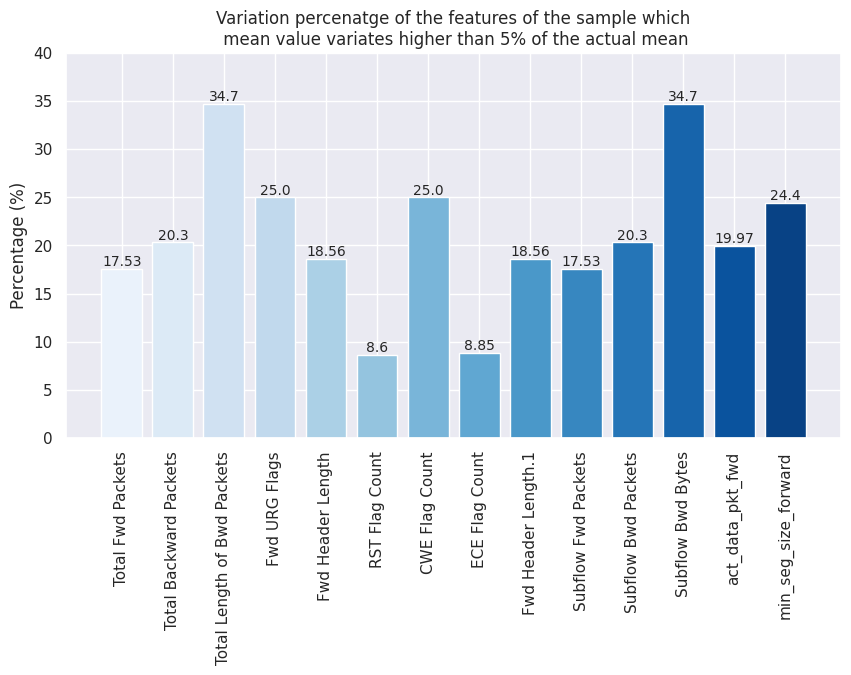

In [ ]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [ ]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33346
2.  Flow Duration                 : 256627
3.  Total Fwd Packets             : 659
4.  Total Backward Packets        : 820
5.  Total Length of Fwd Packets   : 9070
6.  Total Length of Bwd Packets   : 23963
7.  Fwd Packet Length Max         : 3701
8.  Fwd Packet Length Min         : 236
9.  Fwd Packet Length Mean        : 34946
10. Fwd Packet Length Std         : 66038
11. Bwd Packet Length Max         : 3936
12. Bwd Packet Length Min         : 449
13. Bwd Packet Length Mean        : 45585
14. Bwd Packet Length Std         : 62492
15. Flow Bytes/s                  : 346856
16. Flow Packets/s                : 288294
17. Flow IAT Mean                 : 274182
18. Flow IAT Std                  : 229680
19. Flow IAT Max                  : 167860
20. Flow IAT Min                  : 45941
21. Fwd IAT Total                 : 119784
22. Fwd IAT Mean                  : 164556
23. Fwd IAT Std                   : 148638
24. Fwd IAT

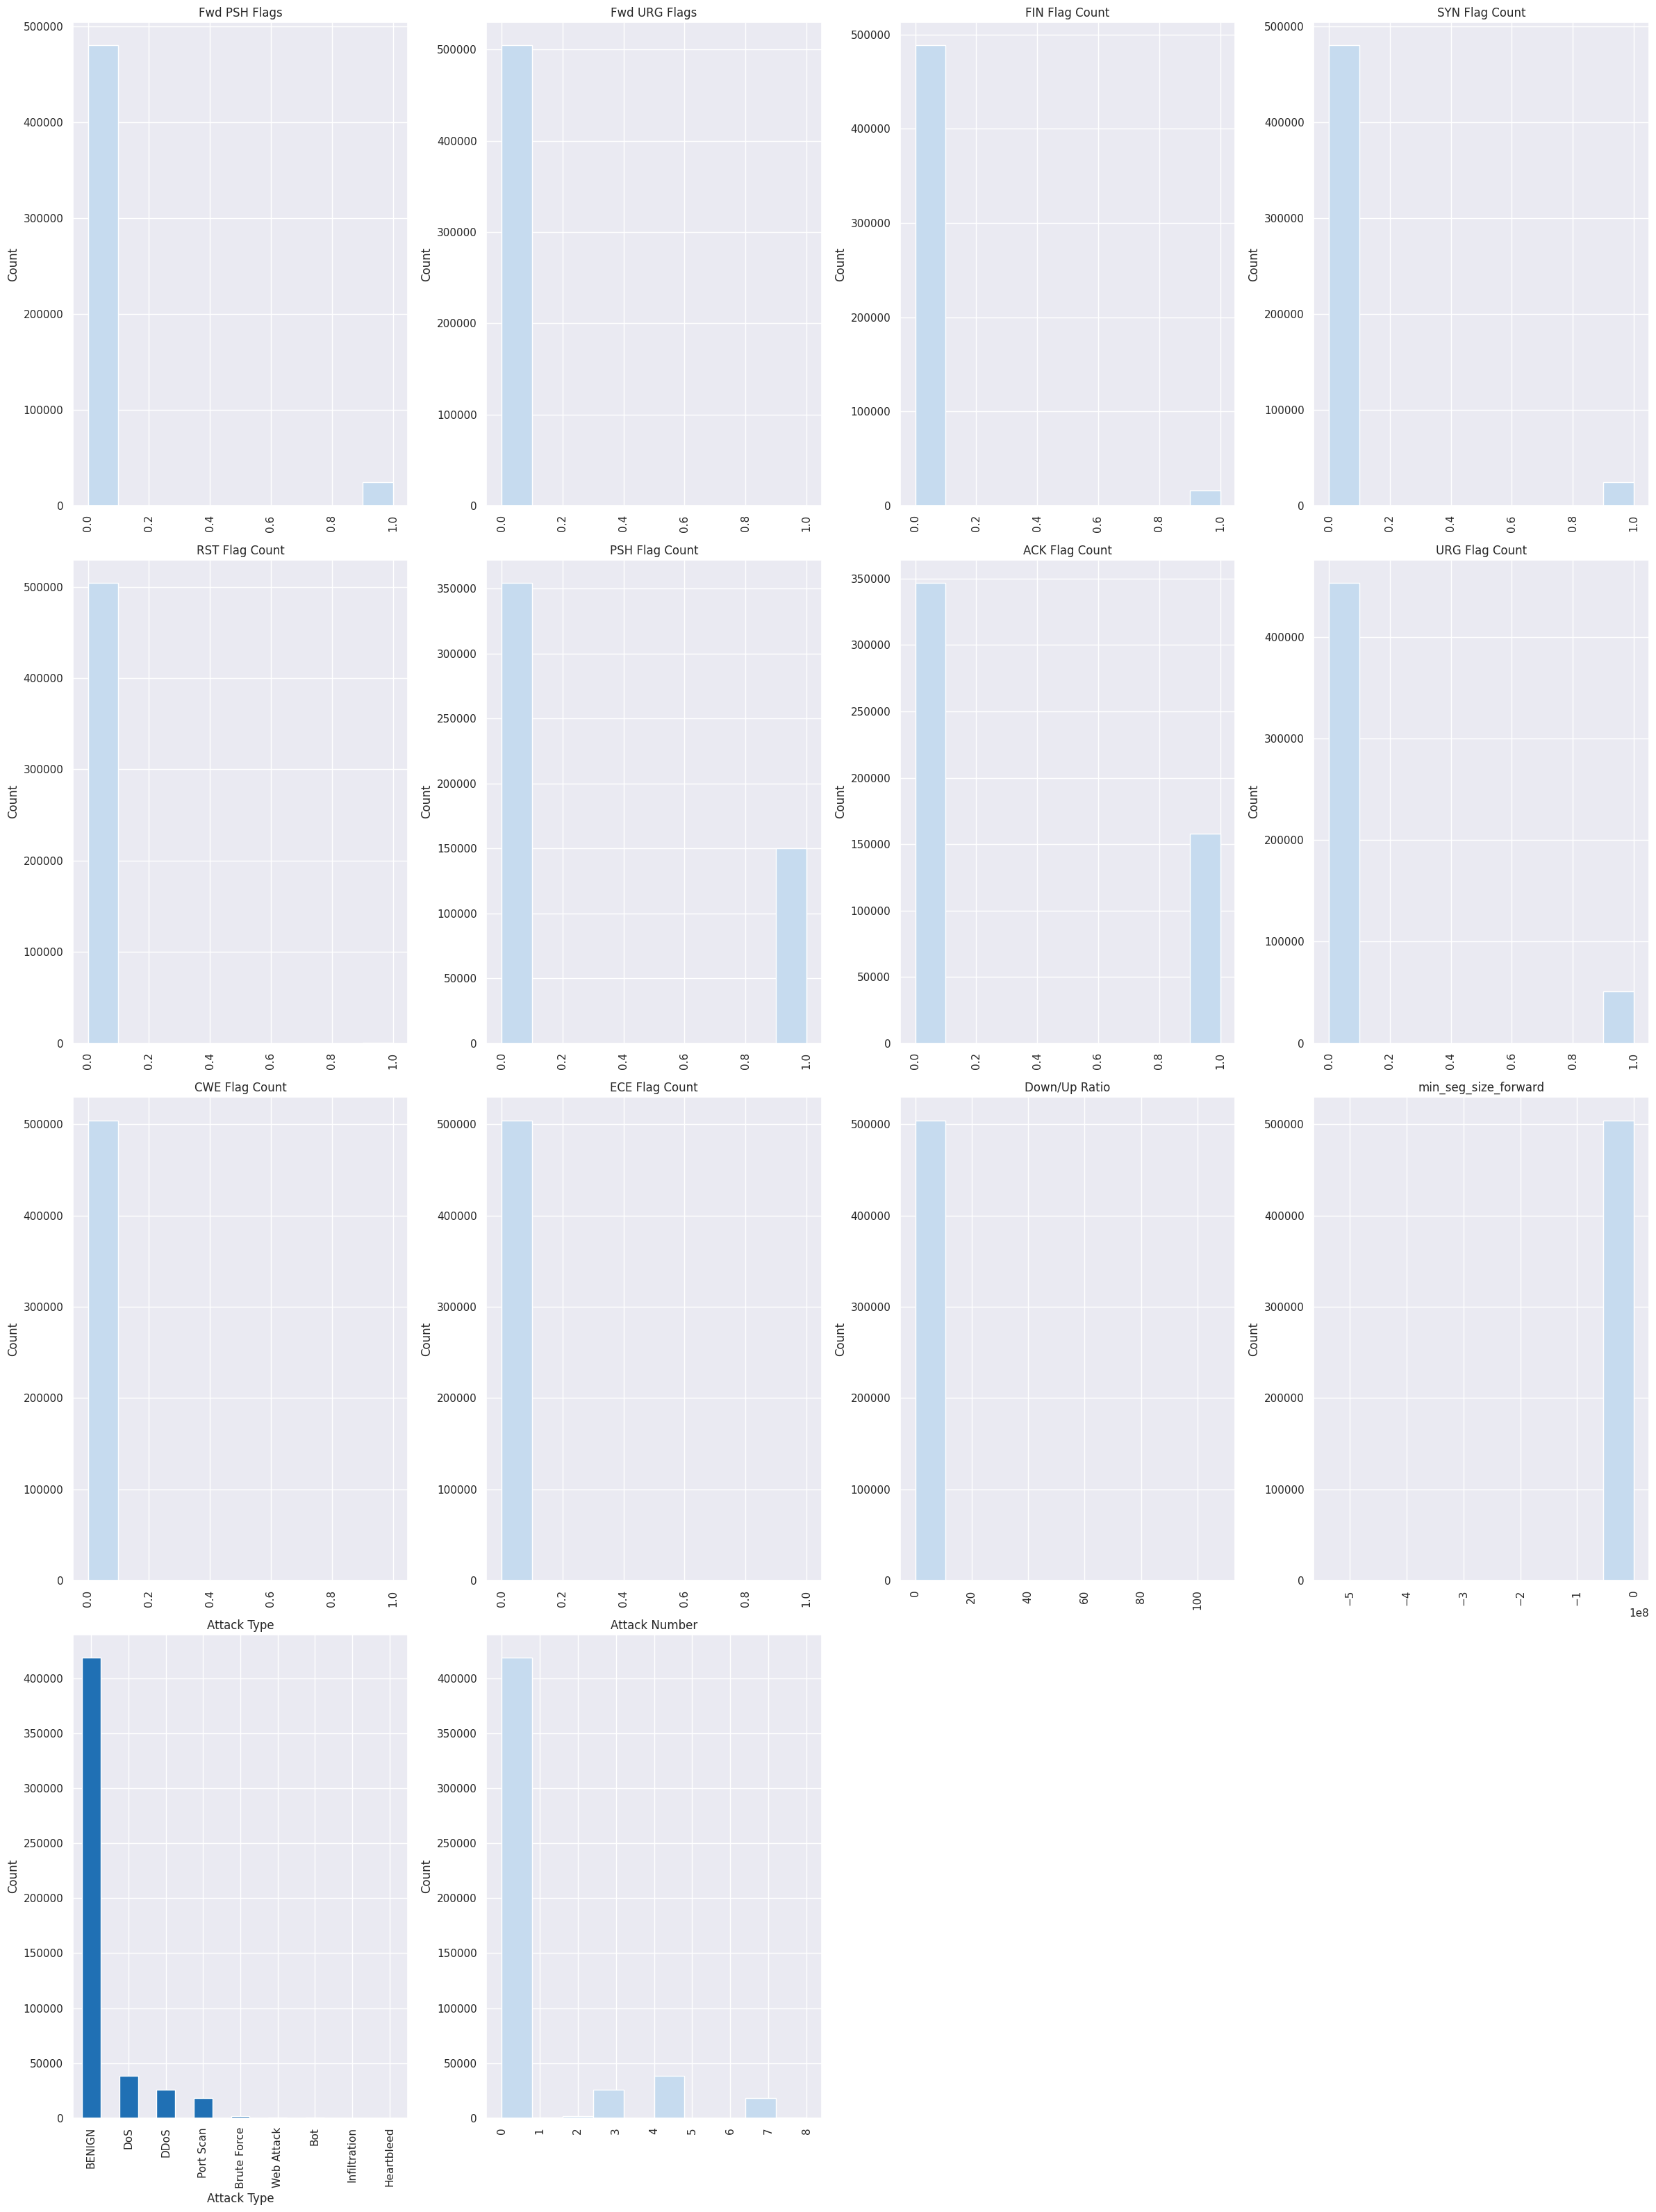

In [ ]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109246               21.66
Flow Duration                        93195               18.47
Total Fwd Packets                    50245                9.96
Total Backward Packets               47509                9.42
Total Length of Fwd Packets          62790               12.45
Total Length of Bwd Packets         114959               22.79
Fwd Packet Length Max                49348                9.78
Fwd Packet Length Min                 2490                0.49
Fwd Packet Length Mean               35398                7.02
Fwd Packet Length Std                47567                9.43
Bwd Packet Length Max                74464               14.76
Bwd Packet Length Min                13428                2.66
Bwd Packet Length Mean               87290               17.30
Bwd Packet Length Std                91318               18.10
Flow Bytes/s                         94952             

In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 93525 (22.33%)
- DoS: 0 (0.00%)
- DDoS: 2 (0.01%)
- Port Scan: 2305 (12.51%)
- Brute Force: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Bot: 0 (0.00%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 97175 (23.20%)
- DoS: 8444 (21.87%)
- DDoS: 4397 (16.96%)
- Port Scan: 403 (2.19%)
- Brute Force: 443 (23.86%)
- Web Attack: 67 (15.62%)
- Bot: 0 (0.00%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 77615 (18.53%)
- DoS: 464 (1.20%)
- DDoS: 833 (3.21%)
- Port Scan: 272 (1.48%)
- Brute Force: 0 (0.00%)
- Web Attack: 68 (15.85%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Backward Packets
- BENIGN: 59799 (14.28%)
- DoS: 4479 (11.60%)
- DDoS: 0 (0.00%)
- Port Scan: 97 (0.53%)
- Brute Force: 0 (0.00%)
- Web Attack: 36 (8.39%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 80997 (19

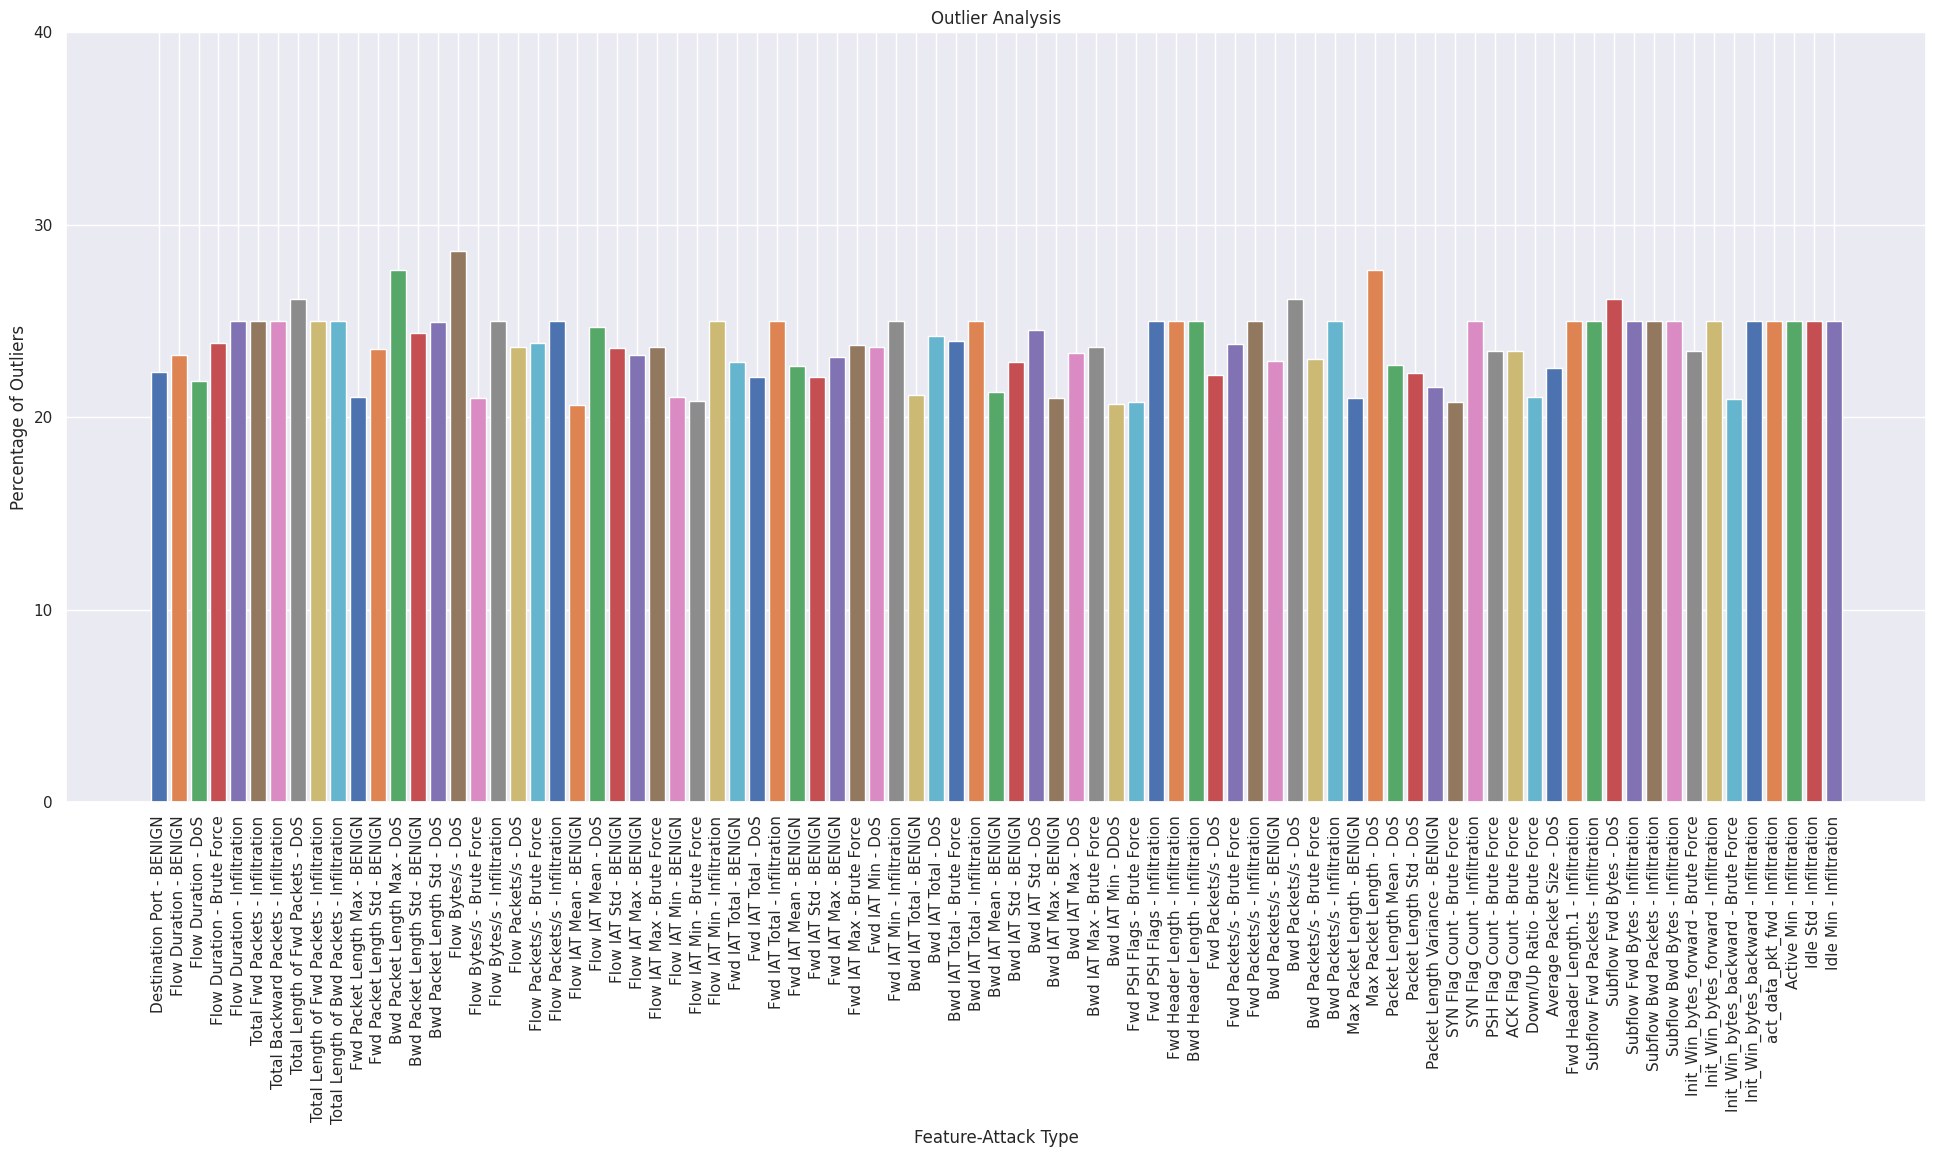

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

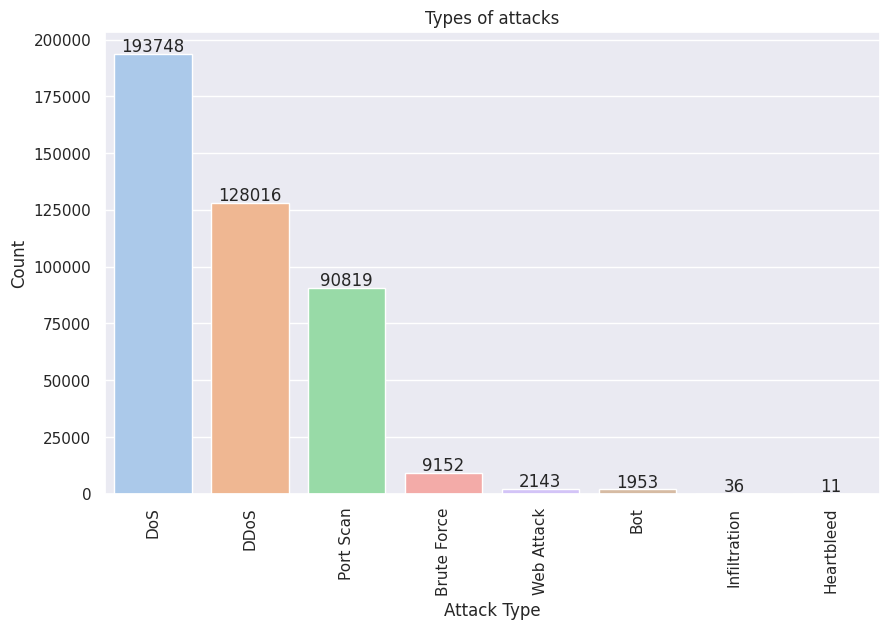

In [ ]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

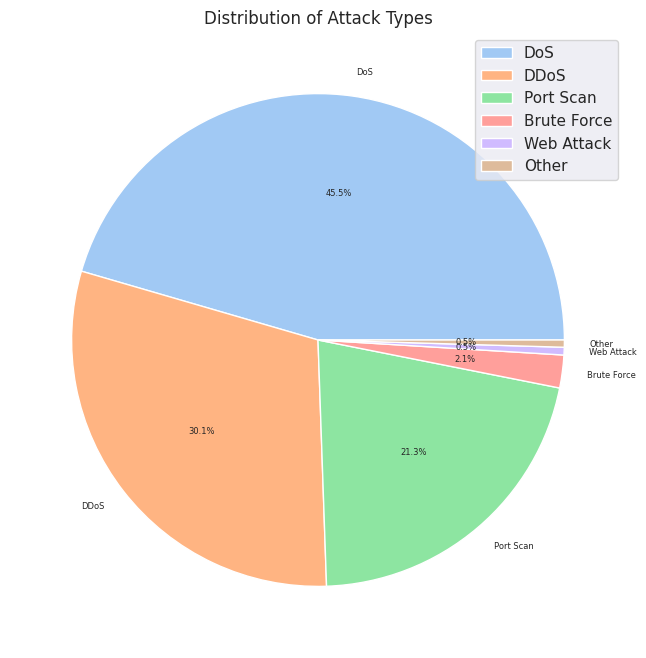

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
data.groupby('Attack Type').first()

Destination Port  Flow Duration  Total Fwd Packets  \
Attack Type                                                        
BENIGN                   49188              4                  2   
Bot                       8080       60202640                  9   
Brute Force                 80        5216127                  3   
DDoS                        80        1293792                  3   
DoS                         80        5169956                  8   
Heartbleed                 444      119302728               2685   
Infiltration               444       42664070                  5   
Port Scan                   80        5021059                  6   
Web Attack                  80        5185118                  7   

              Total Backward Packets  Total Length of Fwd Packets  \
Attack Type                                                         
BENIGN                             0                           12   
Bot                                9                          322   
Brute Force                        1                            0   
DDoS                               7                           26   
DoS                                6                         1101   
Heartbleed                      1729                         8299   
Infiltration                       6                          141   
Port Scan                          5                          703   
Web Attack                         7                         1022   

              Total Length of Bwd Packets  Fwd Packet Length Max  \
Attack Type                                                        
BENIGN                                  0                      6   
Bot                                   256                    322   
Brute Force                             0                      0   
DDoS                                11607                     20   
DoS                                  4222                    410   
Heartbleed                        7556917                    517   
Infiltration                          291                     93   
Port Scan                            1414                    356   
Web Attack                           2321                    372   

              Fwd Packet Length Min  Fwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            6                6.000000   
Bot                               0               35.777778   
Brute Force                       0                0.000000   
DDoS                              0                8.666667   
DoS                               0              137.625000   
Heartbleed                        0                3.090875   
Infiltration                      0               28.200000   
Port Scan                         0              117.166667   
Web Attack                        0              146.000000   

              Fwd Packet Length Std  Bwd Packet Length Max  \
Attack Type                                                  
BENIGN                     0.000000                      0   
Bot                      107.333333                    256   
Brute Force                0.000000                      0   
DDoS                      10.263203                   5840   
DoS                      185.758628                   3525   
Heartbleed                16.858421                  17376   
Infiltration              38.861292                    267   
Port Scan                181.536131                   1050   
Web Attack               184.078788                   1047   

              Bwd Packet Length Min  Bwd Packet Length Mean  \
Attack Type                                                   
BENIGN                            0                0.000000   
Bot                               0               28.444444   
Brute Force                       0                0.000000   
DDoS                              0             1658.142857   
D

**Data Preprocessing**

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1520.28 MB
Final memory usage: 789.01 MB


In [ ]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 48.10%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522362 entries, 0 to 2522361
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  

In [ ]:
data.describe().transpose()

count          mean           std  \
Destination Port             2522362.0  8.704762e+03  1.902507e+04   
Flow Duration                2522362.0  1.658132e+07  3.522426e+07   
Total Fwd Packets            2522362.0  1.027627e+01  7.941738e+02   
Total Backward Packets       2522362.0  1.156596e+01  1.056594e+03   
Total Length of Fwd Packets  2522362.0  6.115751e+02  1.058499e+04   
Total Length of Bwd Packets  2522362.0  1.813315e+04  2.397434e+06   
Fwd Packet Length Max        2522362.0  2.310918e+02  7.561625e+02   
Fwd Packet Length Min        2522362.0  1.919464e+01  6.079447e+01   
Fwd Packet Length Mean       2522362.0  6.347013e+01  1.952963e+02   
Fwd Packet Length Std        2522362.0  7.727757e+01  2.961174e+02   
Bwd Packet Length Max        2522362.0  9.743700e+02  2.037859e+03   
Bwd Packet Length Min        2522362.0  4.313467e+01  7.087022e+01   
Bwd Packet Length Mean       2522362.0  3.404135e+02  6.350376e+02   
Bwd Packet Length Std        2522362.0  3.763118e+02  8.780369e+02   
Flow Bytes/s                 2522362.0  1.409834e+06  2.653223e+07   
Flow Packets/s               2522362.0  4.726262e+04  2.024083e+05   
Flow IAT Mean                2522362.0  1.445245e+06  4.609649e+06   
Flow IAT Std                 2522362.0  3.276119e+06  8.512021e+06   
Flow IAT Max                 2522362.0  1.029310e+07  2.567868e+07   
Flow IAT Min                 2522362.0  1.703157e+05  3.013372e+06   
Fwd IAT Total                2522362.0  1.624176e+07  3.515781e+07   
Fwd IAT Mean                 2522362.0  2.917448e+06  9.831050e+06   
Fwd IAT Std                  2522362.0  3.666366e+06  1.021767e+07   
Fwd IAT Max                  2522362.0  1.013665e+07  2.575975e+07   
Fwd IAT Min                  2522362.0  1.134967e+06  9.056733e+06   
Bwd IAT Total                2522362.0  1.110336e+07  3.022113e+07   
Bwd IAT Mean                 2522362.0  2.026477e+06  9.256496e+06   
Bwd IAT Std                  2522362.0  1.667646e+06  6.533546e+06   
Bwd IAT Max                  2522362.0  5.257358e+06  1.809655e+07   
Bwd IAT Min                  2522362.0  1.085438e+06  8.794528e+06   
Fwd PSH Flags                2522362.0  4.873805e-02  2.153199e-01   
Bwd PSH Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd URG Flags                2522362.0  3.171630e-05  5.631635e-03   
Bwd URG Flags                2522362.0  0.000000e+00  0.000000e+00   
Fwd Header Length            2522362.0 -2.918210e+04  2.230271e+07   
Bwd Header Length            2522362.0 -2.553644e+03  1.538422e+06   
Fwd Packets/s                2522362.0  4.083433e+04  1.909485e+05   
Bwd Packets/s                2522362.0  6.509477e+03  3.788238e+04   
Min Packet Length            2522362.0  1.682349e+01  2.557873e+01   
Max Packet Length            2522362.0  1.063098e+03  2.121197e+03   
Packet Length Mean           2522362.0  1.905415e+02  3.177694e+02   
Packet Length Std            2522362.0  3.299987e+02  6.619749e+02   
Packet Length Variance       2522362.0  5.454386e+05  1.735212e+06   
FIN Flag Count               2522362.0  3.214685e-02  1.763900e-01   
SYN Flag Count               2522362.0  4.873805e-02  2.153199e-01   
RST Flag Count               2522362.0  2.719673e-04  1.648919e-02   
PSH Flag Count               2522362.0  2.975192e-01  4.571669e-01   
ACK Flag Count               2522362.0  3.121875e-01  4.633860e-01   
URG Flag Count               2522362.0  1.014276e-01  3.018941e-01   
CWE Flag Count               2522362.0  3.171630e-05  5.631635e-03   
ECE Flag Count               2522362.0  2.731567e-04  1.652520e-02   
Down/Up Ratio                2522362.0  7.003495e-01  6.955667e-01   
Average Packet Size          2522362.0  2.123115e+02  3.456645e+02   
Avg Fwd Segment Size         2522362.0  6.347013e+01  1.952963e+02   
Avg Bwd Segment Size         2522362.0  3.404135e+02  6.350376e+02   
Fwd Header Length.1          2522362.0 -2.918210e+04  2.230271e+07   
Fwd Avg Bytes/Bulk           2522362.0  0.0

In [ ]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
data.shape

(2522362, 71)

In [ ]:
# Columns after removing non variant columns
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

**PCA**

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.30%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       -2.357605 -0.054980  0.577367  0.734454  3.730371  0.234648 -0.015694   
1       -2.883854 -0.069938  0.911321  1.763147  8.846136  0.620454 -0.056858   
2       -2.416928 -0.056683  0.615335  0.850869  4.304213  0.275779 -0.020438   
3       -2.884705 -0.069978  0.912183  1.765263  8.851561  0.618717 -0.057028   
4       -1.505248  0.080886 -0.504396  0.290414 -0.539267  0.746103  0.100443   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -2.270966 -0.048462  0.480012  0.461159  2.163937 -0.144601 -0.016015   
2522358 -2.267921 -0.048377  0.478583  0.457923  2.144121 -0.146620 -0.015946   
2522359 -2.267236 -0.048358  0.478260  0.457172  2.139660 -0.147061 -0.015930   
2522360 -2.102459 -0.041899  0.361540  0.268739  1.795816  0.284755  0.006681   
2522361 -2.382427 -0.018449  0.397038  0.860374  2.465448  0.612889  0.069454   

              PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0       -0.215593 -0.278501  1.087262  0.032711  0.067621  1.638439  0.371324   
1        1.106466  1.906559 -2.756474 -0.950592 -0.843113  6.052571  1.568504   
2       -0.070542 -0.035290  0.664153 -0.076172 -0.033045  2.132309  0.504258   
3        1.104621  1.906986 -2.752501 -0.950219 -0.842586  6.055982  1.568418   
4        0.732508 -1.145775 -0.563206 -0.043730 -0.207928 -0.433553  0.033402   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -0.777804 -0.908055  2.711084  0.413813  0.405736  0.990244 -0.084219   
2522358 -0.780613 -0.911196  2.717732  0.416385  0.408586  0.957450 -0.091206   
2522359 -0.781230 -0.911881  2.719162  0.416950  0.409214  0.950138 -0.092751   
2522360 -0.296210 -0.631077  0.966695  0.082003  0.111121 -0.168879  0.134400   
2522361 -0.406985 -2.358812  3.918983  0.654209  0.503064  1.381932 -0.127360   

             PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0       -0.794797  0.003730  0.069457  0.614933 -0.658005 -0.596658 -0.350690   
1       -4.731659 -0.120694  1.313557  1.949344 -0.497494 -0.591938 -0.199933   
2       -1.230418 -0.009935  0.206592  0.763981 -0.642472 -0.598090 -0.334834   
3       -4.729850 -0.120534  1.312459  1.950124 -0.499796 -0.593895 -0.200827   
4       -0.609130  0.018303 -0.249173 -0.475477 -0.140381  0.113623 -0.114053   
...           ...       ...       ...       ...       ...       ...       ...   
2522357  0.911051  0.011116 -0.030085  0.339254 -0.328302 -0.307958 -0.436224   
2522358  0.928823  0.012636 -0.044514  0.326976 -0.347688 -0.340585 -0.425384   
2522359  0.932744  0.012972 -0.047707  0.324249 -0.351975 -0.347804 -0.422976   
2522360 -0.233594  0.075831 -0.641996 -0.128213 -0.838009 -0.492747 -0.516140   
2522361  1.307416  0.042496 -0.311665  0.020408  1.495163 -1.995012  3.823072   

             PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0       -0.714309 -1.721585 -0.069528 -0.420207  0.904754 -0.147988 -0.334371   
1       -0.566894 -5.606576  0.296477  1.603394  0.594120  0.282642 -2.347082   
2       -0.697290 -2.155998 -0.032073 -0.196749  0.868293 -0.101730 -0.545536   
3       -0.566254 -5.609324  0.293264  1.602008  0.592174  0.281052 -2.334612   
4        0.096071  0.291834  0.385968 -0.255655 -0.689650 -0.599155  0.116353   
...           ...       ...       ...       ...       ...       ...       ...   
2522357 -1.017082 -0.319116 -0.280794 -0.369498  0.762724 -0.043101  0.787857   
2522358 -1.035495 -0.346322 -0.274981 -0.359969  0.758203 -0.041162  0.789232   
2522359 -1.039582 -0.352317 -0.273678 -0.357846  0.757177 -0.040728  0.789376   
2522360 -0.084907 -0.588280  0.123071 -0.998522  0.312900 -0.372704  1.793470   
2522361  3.436722 -0.633797 -0.780987  0.579970  0.555557  0.295253 -0.034873   

             PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0        1.487918 -0.163631 -0.219312 -0.

In [ ]:
# For cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
0    7545
1    7455
Name: count, dtype: int64


In [ ]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 0.9035555555555556, 0.9182222222222223, 0.9057777777777778, 0.8977777777777778, 0.9035555555555556

Mean cross-validation score: 0.91


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

svm1 = SVC(kernel='poly', C=1, random_state=0, probability=True)

# ---- Cross Validation (Accuracy only) ----
cv_scores = cross_val_score(svm1, X_train_bc, y_train_bc, cv=5)
print("\nSupport Vector Machine (Model 1)")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# ---- Train Final Model ----
svm1.fit(X_train_bc, y_train_bc)

# ---- Predictions ----
y_pred = svm1.predict(X_test_bc)

# ==========================================
# 3) Evaluation on Test Set
# ==========================================
print("\nFinal Test Metrics:")
print(f"Accuracy : {accuracy_score(y_test_bc, y_pred):.2f}")
print(f"Precision: {precision_score(y_test_bc, y_pred):.2f}")
print(f"Recall   : {recall_score(y_test_bc, y_pred):.2f}")
print(f"F1-score : {f1_score(y_test_bc, y_pred):.2f}")

print("\nClassification Report:\n", classification_report(y_test_bc, y_pred))


Support Vector Machine (Model 1)
Cross-validation scores: [0.90355556 0.91822222 0.90577778 0.89777778 0.90355556]
Mean CV Accuracy: 0.91

Final Test Metrics:
Accuracy : 0.89
Precision: 0.96
Recall   : 0.83
F1-score : 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1839
           1       0.96      0.83      0.89      1911

    accuracy                           0.89      3750
   macro avg       0.90      0.90      0.89      3750
weighted avg       0.90      0.89      0.89      3750



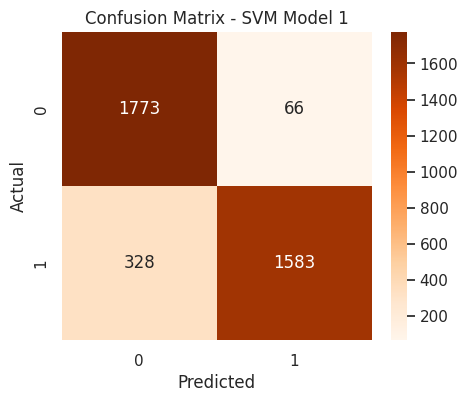

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for Model 1
y_pred1 = svm1.predict(X_test_bc)

# Confusion Matrix
cm1 = confusion_matrix(y_test_bc, y_pred1)

plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Oranges',
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model 1")
plt.show()


In [ ]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 0.9648888888888889, 0.9631111111111111, 0.9608888888888889, 0.9524444444444444, 0.9568888888888889

Mean cross-validation score: 0.96


Support Vector Machine Model 2

Cross-validation scores: 0.9648888888888889, 0.9631111111111111, 0.9608888888888889, 0.9524444444444444, 0.9568888888888889
Mean cross-validation score: 0.96

Final Test Metrics (Model 2):
Accuracy : 0.96
Precision: 0.94
Recall   : 0.98
F1-score : 0.96

Classification Report (Model 2):
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1839
           1       0.94      0.98      0.96      1911

    accuracy                           0.96      3750
   macro avg       0.96      0.96      0.96      3750
weighted avg       0.96      0.96      0.96      3750



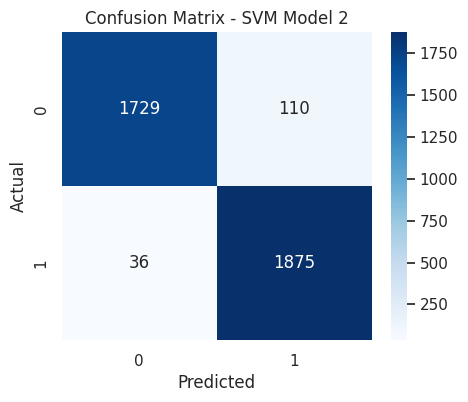

SVM Model 1 intercept: -0.6535641143681415
SVM Model 2 intercept: -0.42621489300223303


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train & CV for Model 2
svm2 = SVC(kernel='rbf', C=1, gamma=0.1, random_state=0, probability=True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv=5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'Mean cross-validation score: {cv_svm2.mean():.2f}')

# Predictions
y_pred2 = svm2.predict(X_test_bc)

# Final Test Metrics
print("\nFinal Test Metrics (Model 2):")
print(f"Accuracy : {accuracy_score(y_test_bc, y_pred2):.2f}")
print(f"Precision: {precision_score(y_test_bc, y_pred2):.2f}")
print(f"Recall   : {recall_score(y_test_bc, y_pred2):.2f}")
print(f"F1-score : {f1_score(y_test_bc, y_pred2):.2f}")

print("\nClassification Report (Model 2):\n", classification_report(y_test_bc, y_pred2))

# Confusion Matrix
cm = confusion_matrix(y_test_bc, y_pred2)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model 2")
plt.show()

# Intercepts
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)


In [ ]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

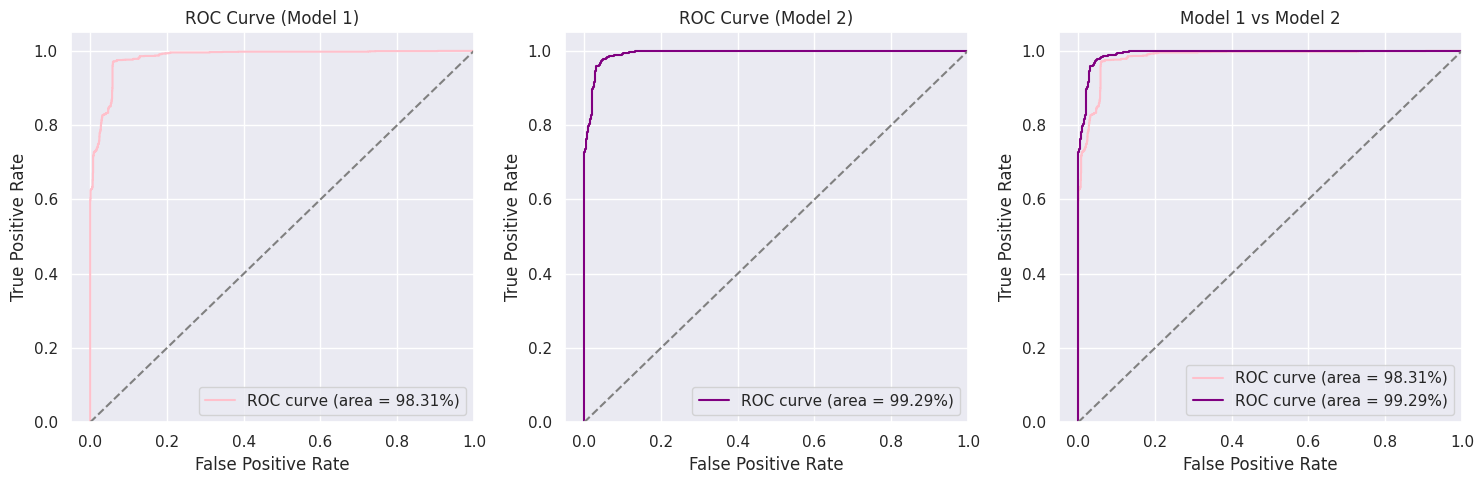

In [ ]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

# Set custom colors (0 = diagonal, 1 = model1, 2 = model2)
colors = ["gray", "pink", "purple"]

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()


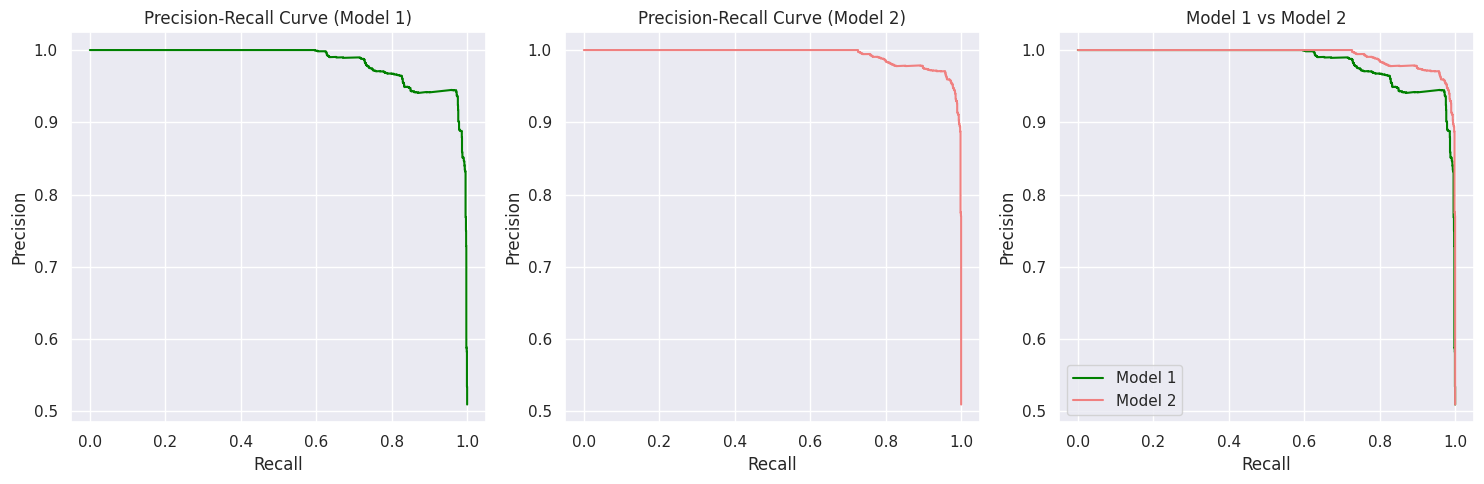

In [ ]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

# Custom colors: Model 1 = green, Model 2 = light red
colors = ["gray", "green", "lightcoral"]

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()


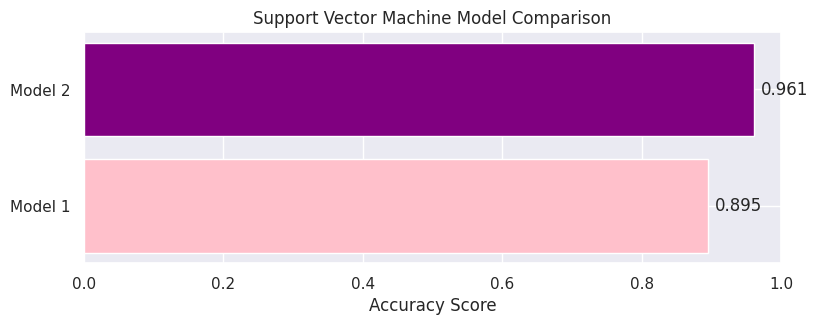

In [ ]:
# Predict for both SVM models
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

# Now compute accuracy
from sklearn.metrics import accuracy_score

# Define pink & purple colors
palette = ["pink", "purple"]

acc1 = accuracy_score(y_test_bc, y_pred_svm1)
acc2 = accuracy_score(y_test_bc, y_pred_svm2)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()


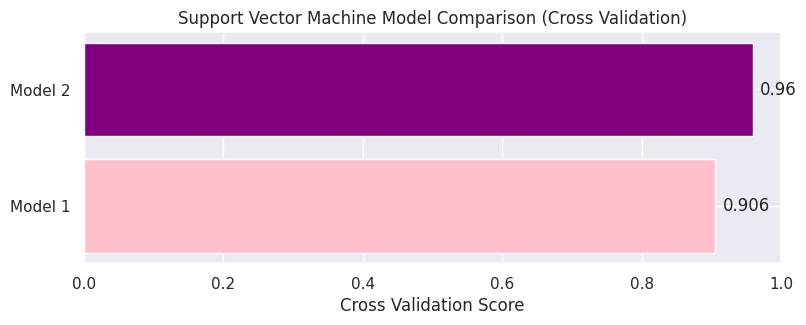

In [ ]:
palette = ["pink", "purple"]

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

In [ ]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [ ]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
DoS            5000
DDoS           5000
Bot            5000
BENIGN         5000
Port Scan      5000
Brute Force    5000
Web Attack     5000
Name: count, dtype: int64

In [ ]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9556190476190476, 0.9535238095238096, 0.9620952380952381, 0.9647619047619047, 0.9641904761904762

Mean cross-validation score: 0.96



Final Test Metrics:
Accuracy : 0.95
Precision: 0.96
Recall   : 0.95
F1-score : 0.95

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.84      0.88      0.86      1229
         Bot       0.95      0.97      0.96      1256
 Brute Force       0.99      0.97      0.98      1262
        DDoS       0.98      0.99      0.99      1239
         DoS       0.97      0.96      0.97      1249
   Port Scan       0.96      0.99      0.97      1219
  Web Attack       0.99      0.92      0.96      1296

    accuracy                           0.95      8750
   macro avg       0.96      0.95      0.95      8750
weighted avg       0.96      0.95      0.95      8750



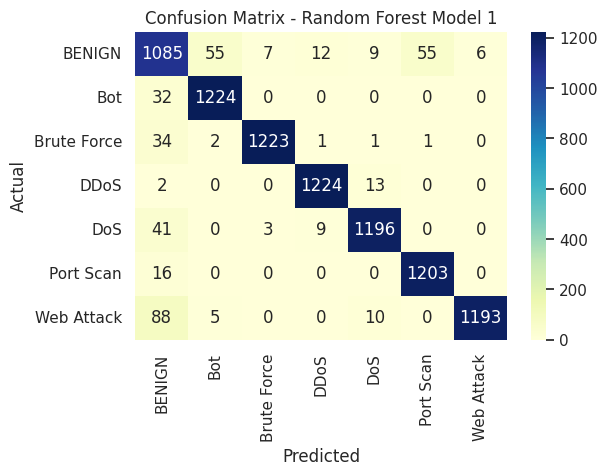

In [ ]:
# Final Test Metrics
# -------------------------------
y_pred_rf1 = rf1.predict(X_test)

print("\nFinal Test Metrics:")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf1):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf1, average='weighted'):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf1, average='weighted'):.2f}")
print(f"F1-score : {f1_score(y_test, y_pred_rf1, average='weighted'):.2f}")

# Detailed per-class report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf1))

# -------------------------------
# Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_test, y_pred_rf1)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=rf1.classes_, yticklabels=rf1.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Model 1")
plt.show()

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9798095238095238, 0.9855238095238095, 0.9828571428571429, 0.984, 0.9820952380952381

Mean cross-validation score: 0.98



Final Test Metrics:
Accuracy : 0.98
Precision: 0.98
Recall   : 0.98
F1-score : 0.98

Classification Report:
              precision    recall  f1-score   support

      BENIGN       0.96      0.94      0.95      1216
         Bot       0.98      0.99      0.99      1246
 Brute Force       0.99      0.98      0.99      1226
        DDoS       0.99      0.99      0.99      1232
         DoS       0.98      0.98      0.98      1258
   Port Scan       0.98      0.99      0.99      1288
  Web Attack       0.99      0.99      0.99      1284

    accuracy                           0.98      8750
   macro avg       0.98      0.98      0.98      8750
weighted avg       0.98      0.98      0.98      8750



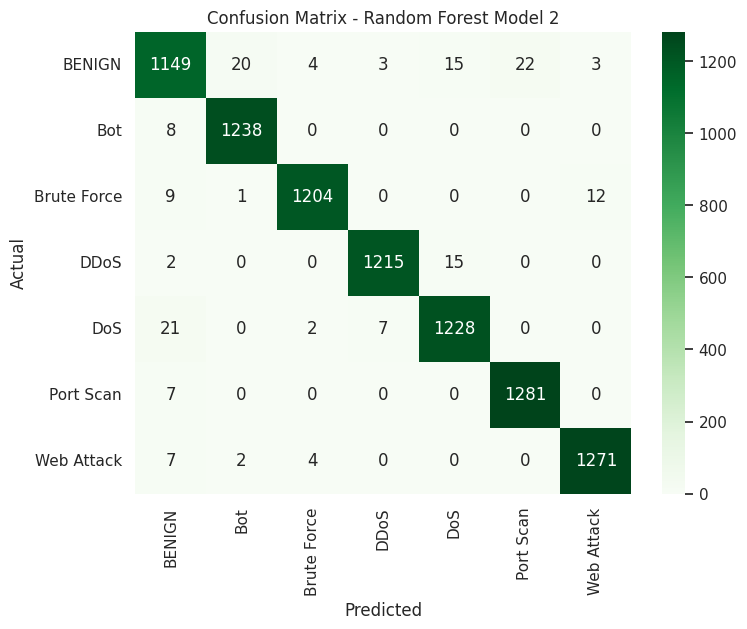


Per-Class Confusion Matrix Breakdown:

Class: BENIGN
  True Positive (TP): 1149
  False Negative (FN): 67
  False Positive (FP): 54
  True Negative (TN): 7480

Class: Bot
  True Positive (TP): 1238
  False Negative (FN): 8
  False Positive (FP): 23
  True Negative (TN): 7481

Class: Brute Force
  True Positive (TP): 1204
  False Negative (FN): 22
  False Positive (FP): 10
  True Negative (TN): 7514

Class: DDoS
  True Positive (TP): 1215
  False Negative (FN): 17
  False Positive (FP): 10
  True Negative (TN): 7508

Class: DoS
  True Positive (TP): 1228
  False Negative (FN): 30
  False Positive (FP): 30
  True Negative (TN): 7462

Class: Port Scan
  True Positive (TP): 1281
  False Negative (FN): 7
  False Positive (FP): 22
  True Negative (TN): 7440

Class: Web Attack
  True Positive (TP): 1271
  False Negative (FN): 13
  False Positive (FP): 15
  True Negative (TN): 7451


In [ ]:
# Final Test Metrics
# -------------------------------
y_pred_rf2 = rf2.predict(X_test)

print("\nFinal Test Metrics:")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf2):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf2, average='weighted'):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred_rf2, average='weighted'):.2f}")
print(f"F1-score : {f1_score(y_test, y_pred_rf2, average='weighted'):.2f}")

# Detailed per-class report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf2))

# -------------------------------
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf2.classes_,
            yticklabels=rf2.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Model 2")
plt.show()
# For multi-class, show TP, FP, FN, TN per class
print("\nPer-Class Confusion Matrix Breakdown:")

for i, class_name in enumerate(rf2.classes_):
    tp = cm[i, i]
    fn = cm[i, :].sum() - tp
    fp = cm[:, i].sum() - tp
    tn = cm.sum() - (tp + fn + fp)

    print(f"\nClass: {class_name}")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  False Positive (FP): {fp}")
    print(f"  True Negative (TN): {tn}")



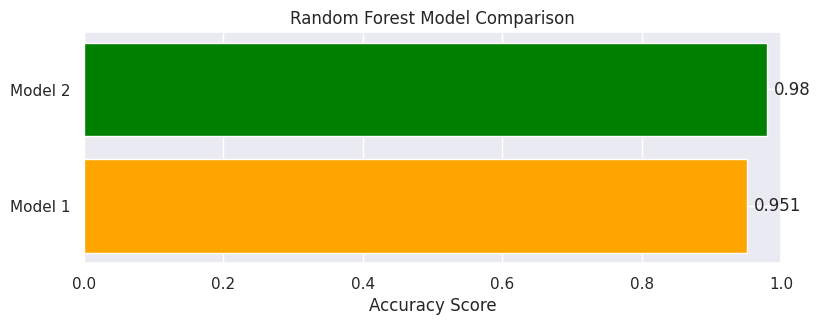

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Model 1
rf1 = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=0)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)

# Train Random Forest Model 2
rf2 = RandomForestClassifier(n_estimators=15, max_depth=8, random_state=0)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)

# Accuracy comparison plot
palette = ["orange", "green"]
acc1 = accuracy_score(y_test, y_pred_rf1)
acc2 = accuracy_score(y_test, y_pred_rf2)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize=(9, 3))
ax.barh(labels, scores, color=palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha='left', va='center')

plt.show()


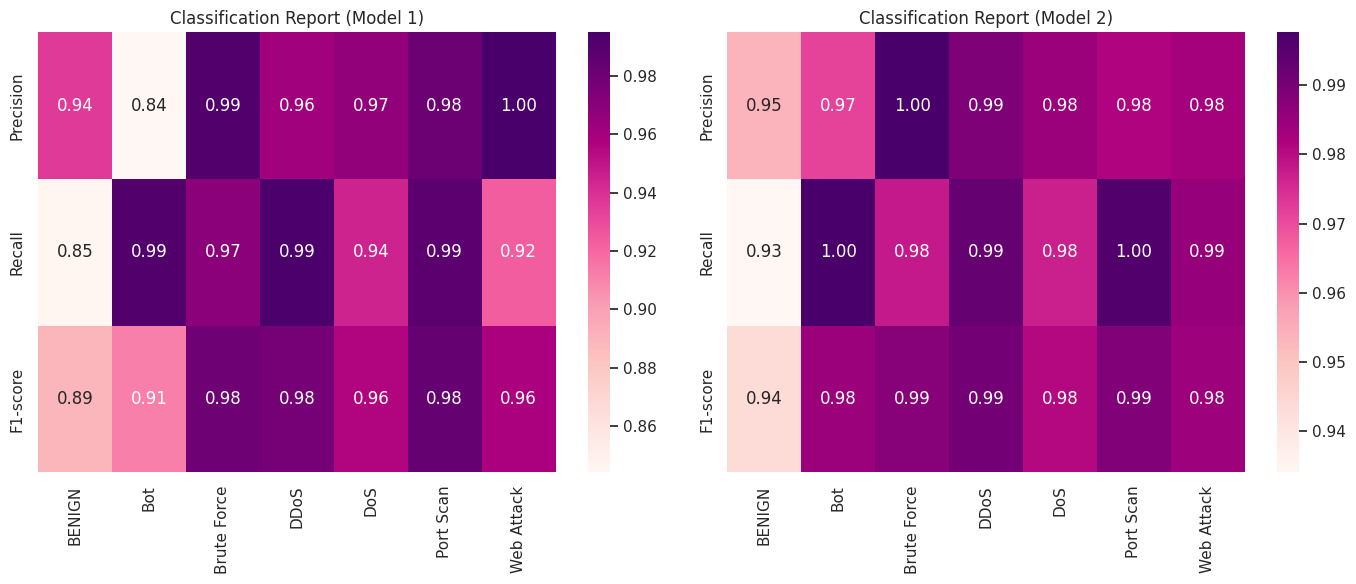

In [ ]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))

# Use purple–pink gradient
sns.heatmap(data1, cmap='RdPu', annot=True, fmt='.2f',
            xticklabels=target_names, yticklabels=rows, ax=axs[0])
sns.heatmap(data2, cmap='RdPu', annot=True, fmt='.2f',
            xticklabels=target_names, yticklabels=rows, ax=axs[1])

axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 33, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 14, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,065 (172.13 KB)

 Trainable params: 43,809 (171.13 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8828 - loss: 0.2803 - val_accuracy: 0.9493 - val_loss: 0.3016
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9485 - loss: 0.1390 - val_accuracy: 0.9600 - val_loss: 0.1266
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9486 - loss: 0.1235 - val_accuracy: 0.9597 - val_loss: 0.1000
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9540 - loss: 0.1163 - val_accuracy: 0.9635 - val_loss: 0.0943
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9569 - loss: 0.1056 - val_accuracy: 0.9653 - val_loss: 0.0898
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9547 - loss: 0.1051 - val_accuracy: 0.9664 - val_loss: 0.0875
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9592 - loss: 0.1004 - val_accuracy: 0.9645 - val_loss: 0.0844
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9594 - loss: 0.0988 - val_accurac

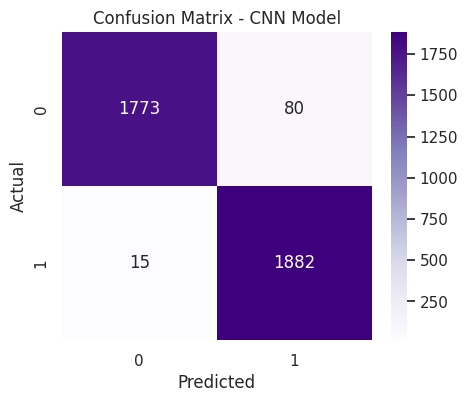

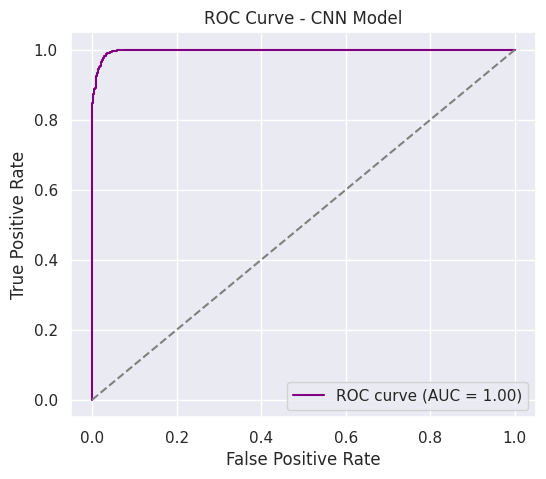

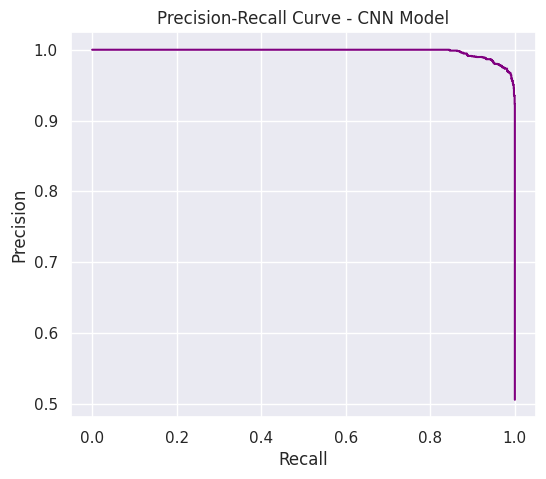

In [ ]:
# ================================================
# 1️⃣ Import Libraries
# ================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten, Input, Multiply, GlobalAveragePooling1D, Reshape

# ================================================
# 2️⃣ Prepare Data
# ================================================
# Assuming bc_data is PCA-transformed
X_bc = bc_data.drop('Attack Type', axis=1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.25, random_state=0
)

# Reshape for CNN (1D convolution on PCA features)
X_train_cnn = X_train_bc.values.reshape(-1, X_train_bc.shape[1], 1)
X_test_cnn = X_test_bc.values.reshape(-1, X_test_bc.shape[1], 1)

input_dim = X_train_bc.shape[1]

# ================================================
# 3️⃣ Novelty: Attention Block
# ================================================
def attention_block(x):
    avg_pool = GlobalAveragePooling1D()(x)
    dense1 = Dense(x.shape[-1]//4, activation='relu')(avg_pool)
    dense2 = Dense(x.shape[-1], activation='sigmoid')(dense1)
    scale = Multiply()([x, Reshape((1, x.shape[-1]))(dense2)])
    return scale

# ================================================
# 4️⃣ Build CNN Model with Attention + Dropout + BatchNorm
# ================================================
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),

    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

# ================================================
# 5️⃣ Train the CNN
# ================================================
history_cnn = cnn_model.fit(
    X_train_cnn, y_train_bc,
    validation_data=(X_test_cnn, y_test_bc),
    epochs=50,
    batch_size=64
)

# ================================================
# 6️⃣ Evaluate Model
# ================================================
y_pred_prob = cnn_model.predict(X_test_cnn).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test_bc, y_pred)
prec = precision_score(y_test_bc, y_pred)
rec = recall_score(y_test_bc, y_pred)
f1 = f1_score(y_test_bc, y_pred)

print("\nFinal Test Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# ================================================
# 7️⃣ Confusion Matrix
# ================================================
cm = confusion_matrix(y_test_bc, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN Model")
plt.show()

# ================================================
# 8️⃣ ROC Curve
# ================================================
fpr, tpr, _ = roc_curve(y_test_bc, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CNN Model")
plt.legend(loc='lower right')
plt.show()

# ================================================
# 9️⃣ Precision-Recall Curve
# ================================================
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test_bc, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - CNN Model")
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 35, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 35, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 35, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 35, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        71,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,377 (396.00 KB)

 Trainable params: 101,249 (395.50 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.8047 - loss: 0.3839 - val_accuracy: 0.8352 - val_loss: 0.5037
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.9304 - loss: 0.1728 - val_accuracy: 0.8709 - val_loss: 0.3436
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.9395 - loss: 0.1470 - val_accuracy: 0.9363 - val_loss: 0.2506
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9511 - loss: 0.1307 - val_accuracy: 0.9456 - val_loss: 0.1824
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.9469 - loss: 0.1318 - val_accuracy: 0.9584 - val_loss: 0.1168
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.9544 - loss: 0.1115 - val_accuracy: 0.9603 - val_loss: 0.1076
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9524 - loss: 0.1156 - val_accuracy: 0.9619 - val_loss: 0.0975
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.9539 - loss: 0.1082 - val_accuracy

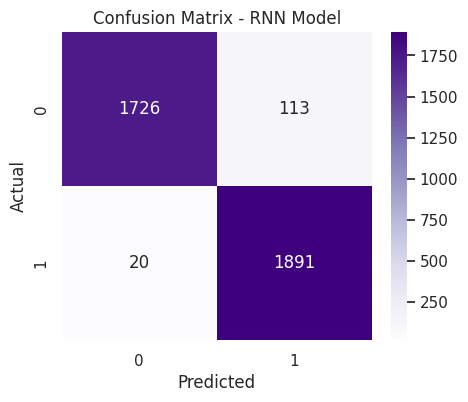

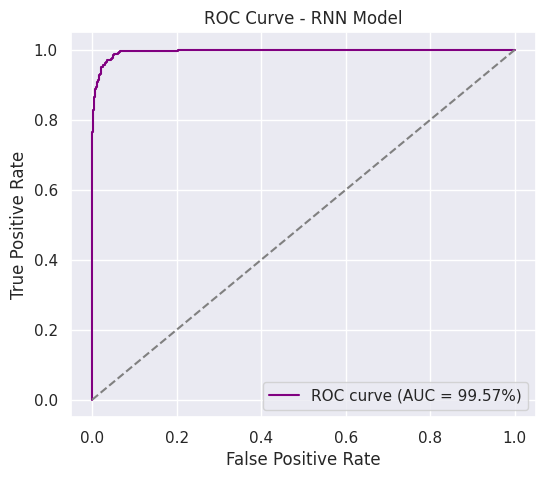

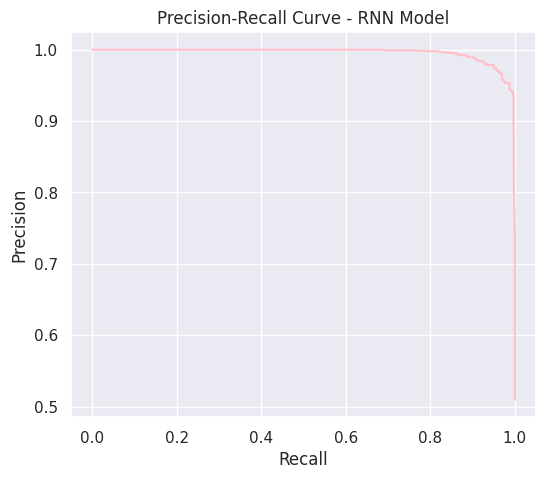

In [ ]:
# -------------------------
# 1. Required Imports
# -------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Flatten

# -------------------------
# 2. Prepare Data
# -------------------------
# Assume bc_data already has PCA applied and balanced
X_bc = bc_data.drop('Attack Type', axis=1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.25, random_state=0
)

# Reshape for RNN (timesteps=features, features=1)
X_train_rnn = X_train_bc.values.reshape(-1, X_train_bc.shape[1], 1)
X_test_rnn = X_test_bc.values.reshape(-1, X_test_bc.shape[1], 1)

# -------------------------
# 3. Build RNN Model with Novelty
# -------------------------
rnn_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, return_sequences=True),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()

# -------------------------
# 4. Train RNN
# -------------------------
history = rnn_model.fit(
    X_train_rnn, y_train_bc,
    validation_data=(X_test_rnn, y_test_bc),
    epochs=20,
    batch_size=128
)

# -------------------------
# 5. Evaluate RNN
# -------------------------
y_pred_prob = rnn_model.predict(X_test_rnn).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test_bc, y_pred)
prec = precision_score(y_test_bc, y_pred)
rec = recall_score(y_test_bc, y_pred)
f1 = f1_score(y_test_bc, y_pred)

print("RNN Model Test Metrics:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_bc, y_pred))

# -------------------------
# 6. Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test_bc, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RNN Model")
plt.show()

# -------------------------
# 7. ROC Curve
# -------------------------
fpr, tpr, _ = roc_curve(y_test_bc, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (AUC = {roc_auc:.2%})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RNN Model')
plt.legend(loc='lower right')
plt.show()

# -------------------------
# 8. Precision-Recall Curve
# -------------------------
precision, recall, _ = precision_recall_curve(y_test_bc, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='pink')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - RNN Model')
plt.show()
